In [20]:
#Importamos las librerias que ocuparemos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Eda Dataset games_clean


In [21]:
#cargamos el dataset games_clean con la ruta de origen
df = pd.read_csv(r'C:\Users\Elias\Documents\Primer Proyecto Individual\Datasets limpios\games_clean')
df_analisis = df
df_analisis.head()


,id,app_name,genres,developer,tags,release_date,price,cleaned_price
0,761140.0,Lost Summoner Kitty,Action,Kotoshiro,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",2018-01-04,4.99,4.99
1,643980.0,Ironbound,Indie,Secret Level SRL,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",2018-01-04,Free To Play,0.00
2,670290.0,Real Pool 3D - Poolians,Casual,Poolians.com,"['Free to Play', 'Simulation', 'Sports', 'Casu...",2017-07-24,Free to Play,0.00
3,767400.0,弹炸人2222,Action,彼岸领域,"['Action', 'Adventure', 'Casual']",2017-12-07,0.99,0.99
4,773570.0,Log Challenge,Action,NaN,"['Action', 'Indie', 'Casual', 'Sports']",NaN,2.99,2.99


In [22]:
# numero de filas y columnas del dataset games_clean
num_filas = df_analisis.shape[0]
print(f"El número de filas es: {num_filas}")


El número de filas es: 32135


In [23]:
def describir_dataframe(df):
    for col in df.columns:
        print(f"\n--- Descripción de la columna: '{col}' ---")
        print(f"Tipo de dato: {df[col].dtype}")
        
        # Comprobar si hay diccionarios en la columna
        if df[col].apply(lambda x: isinstance(x, dict)).any():
            print("Contiene diccionarios, omitiendo análisis de valores únicos.")
        else:
            print(f"Número de valores únicos: {df[col].nunique()}")
            print(f"Número de valores nulos: {df[col].isnull().sum()}")

        if pd.api.types.is_numeric_dtype(df[col]):
            # Si la columna es numérica, mostrar estadísticas básicas
            print(f"Valor mínimo: {df[col].min()}")
            print(f"Valor máximo: {df[col].max()}")
            print(f"Promedio: {df[col].mean()}")
            print(f"Mediana: {df[col].median()}")
            print(f"Desviación estándar: {df[col].std()}")


In [24]:
#describimos el dataset games_clean
describir_dataframe(df_analisis)


--- Descripción de la columna: 'id' ---
Tipo de dato: float64
Número de valores únicos: 32132
Número de valores nulos: 2
Valor mínimo: 10.0
Valor máximo: 2028850.0
Promedio: 451757.4129088476
Mediana: 452060.0
Desviación estándar: 182714.0455457036

--- Descripción de la columna: 'app_name' ---
Tipo de dato: object
Número de valores únicos: 32094
Número de valores nulos: 2

--- Descripción de la columna: 'genres' ---
Tipo de dato: object
Número de valores únicos: 89
Número de valores nulos: 162

--- Descripción de la columna: 'developer' ---
Tipo de dato: object
Número de valores únicos: 10992
Número de valores nulos: 3299

--- Descripción de la columna: 'tags' ---
Tipo de dato: object
Número de valores únicos: 15397
Número de valores nulos: 139

--- Descripción de la columna: 'release_date' ---
Tipo de dato: object
Número de valores únicos: 3582
Número de valores nulos: 2067

--- Descripción de la columna: 'price' ---
Tipo de dato: object
Número de valores únicos: 162
Número de valor

In [25]:
#Mostramos los 10 generos mas frecuentes 
top_generos = df_analisis["genres"].value_counts().head(10)
top_generos_df = pd.DataFrame({'Genre': top_generos.index, 'Count': top_generos.values})
top_generos_df

,Genre,Count
0,Action,11770
1,Adventure,4530
2,Casual,4521
3,Indie,3763
4,Simulation,2019
5,Strategy,1245
6,RPG,718
7,Movie,552
8,Racing,504
9,Early Access,489


C:\Users\Elias\AppData\Local\Temp\ipykernel_17700\3146623485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top_generos_df,x ="Count" ,y="Genre", palette="Blues_d")


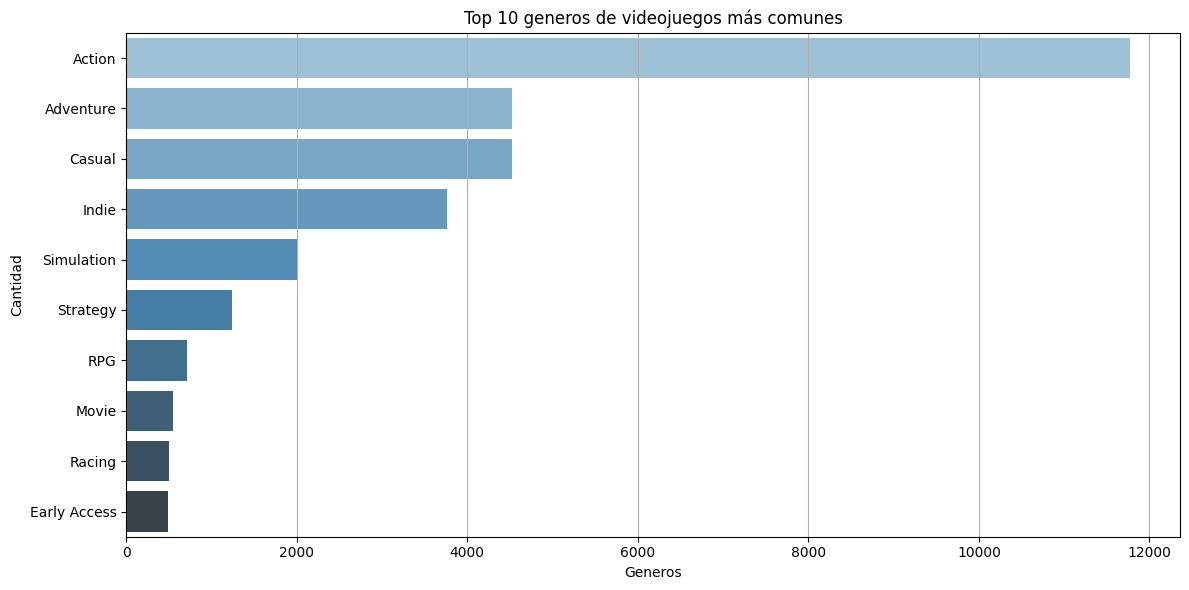

In [26]:
#graficamos los generos mas comunes
plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(data= top_generos_df,x ="Count" ,y="Genre", palette="Blues_d")
plt.title("Top 10 generos de videojuegos más comunes")
plt.xlabel("Generos")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

In [27]:
# Función para calcular el porcentaje de cada género
def calcular_porcentaje(df, columna_genero, columna_cantidad):
    # Verificamos que las columnas existan
    if columna_genero not in df.columns or columna_cantidad not in df.columns:
        raise ValueError("Una de las columnas especificadas no existe en el DataFrame.")
    
    # Agrupar por género y sumar la cantidad
    total_por_genero = df.groupby(columna_genero)[columna_cantidad].sum()
    
    # Calcular el porcentaje
    total_general = total_por_genero.sum()
    porcentaje_genero = (total_por_genero / total_general) * 100
    
    # Convertir a DataFrame para una mejor visualización
    porcentaje_df = porcentaje_genero.reset_index(name='Porcentaje')
    
    return porcentaje_df

In [28]:
#sacamos el porcentaje del dataframe top_generos
porcentaje_top_generos = calcular_porcentaje(top_generos_df, "Genre","Count")
porcentaje_top_generos

,Genre,Porcentaje
0,Action,39.088705
1,Adventure,15.044336
2,Casual,15.014447
3,Early Access,1.623991
4,Indie,12.497094
5,Movie,1.833217
6,RPG,2.384511
7,Racing,1.673807
8,Simulation,6.705191
9,Strategy,4.134702


In [29]:
#analisamos la columna developer
developer_counts = df_analisis["developer"].value_counts().head(10)
developer_counts_df = pd.DataFrame({'Developer': developer_counts.index, 'Count': developer_counts.values})
developer_counts_df

,Developer,Count
0,Ubisoft - San Francisco,1259
1,"SmiteWorks USA, LLC",813
2,Dovetail Games,253
3,"KOEI TECMO GAMES CO., LTD.",232
4,Paradox Development Studio,156
5,Capcom,130
6,Ronimo Games,123
7,Choice of Games,100
8,Musopia,95
9,Stainless Games,95


C:\Users\Elias\AppData\Local\Temp\ipykernel_17700\40187603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=developer_counts_df,x ="Count", y="Developer", palette="muted")


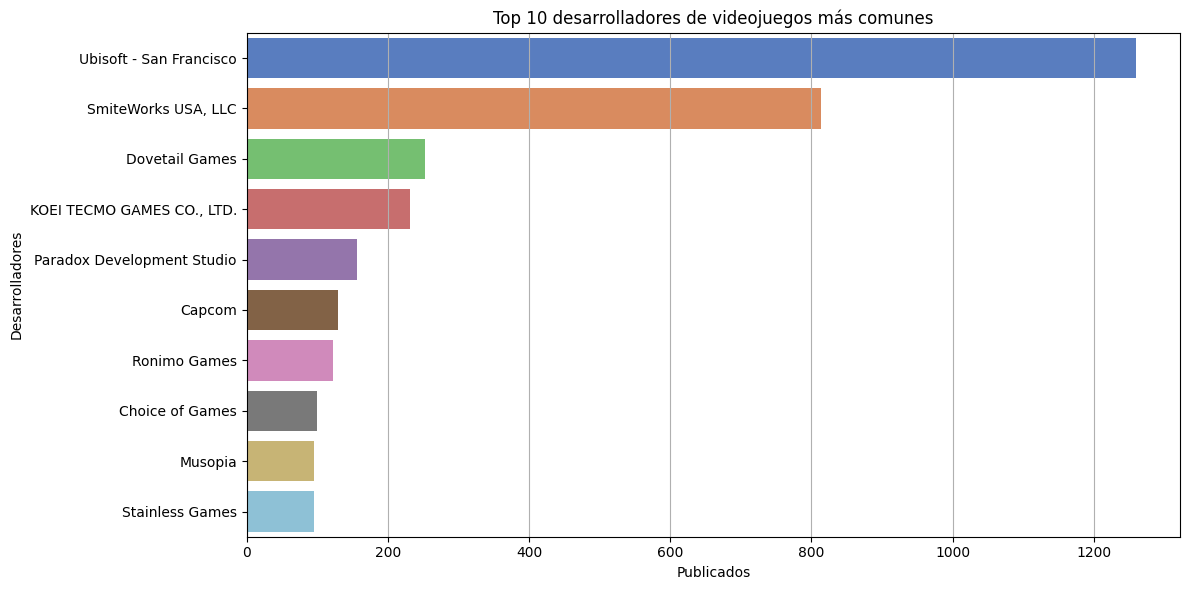

In [30]:
#graficamos el dataframe deldeveloper_counts

plt.figure(figsize=(12, 6))
plt.grid()
sns.barplot(data=developer_counts_df,x ="Count", y="Developer", palette="muted")
plt.title("Top 10 desarrolladores de videojuegos más comunes")
plt.xlabel("Publicados")
plt.ylabel("Desarrolladores")
plt.tight_layout()
plt.show()


In [31]:
#analisamos la columna cleaned_price del dataset
df_analisis["cleaned_price"].describe()

count    30758.000000
mean         8.866855
std         15.903457
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: cleaned_price, dtype: float64

In [32]:
# Obtener precios únicos
precios_unicos = df_analisis["cleaned_price"].unique()

# Definir los bins (20 bordes)
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Asegúrate de tener 19 etiquetas
labels = [
    "0-5", "5-10", "10-15", "15-20", "20-25", 
    "25-30", "30-35", "35-40", "40-45", "45-50", 
    "50-55", "55-60", "60-65", "65-70", "70-75", 
    "75-80", "80-85", "85-90", "90-95", "95-100"
]

# Asegurarte de que los bins son adecuados para los valores únicos
if len(precios_unicos) > 0:  # Solo si hay precios únicos
    # Convertir los precios únicos a un DataFrame para asegurar que son unicos
    df_precios_unicos = pd.DataFrame(precios_unicos, columns=["cleaned_price"])
    
    # Aplicar pd.cut solo a los precios únicos
    df_precios_unicos["price_range"] = pd.cut(df_precios_unicos["cleaned_price"], bins=bins, labels=labels)

    # Si deseas agregar esto de nuevo al DataFrame original
    df_analisis = df_analisis.merge(df_precios_unicos, on="cleaned_price", how="left")
else:
    print("No hay precios únicos para categorizar.")



C:\Users\Elias\AppData\Local\Temp\ipykernel_17700\1689468933.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rango_precio_counts.index, y=rango_precio_counts.values, palette="muted")


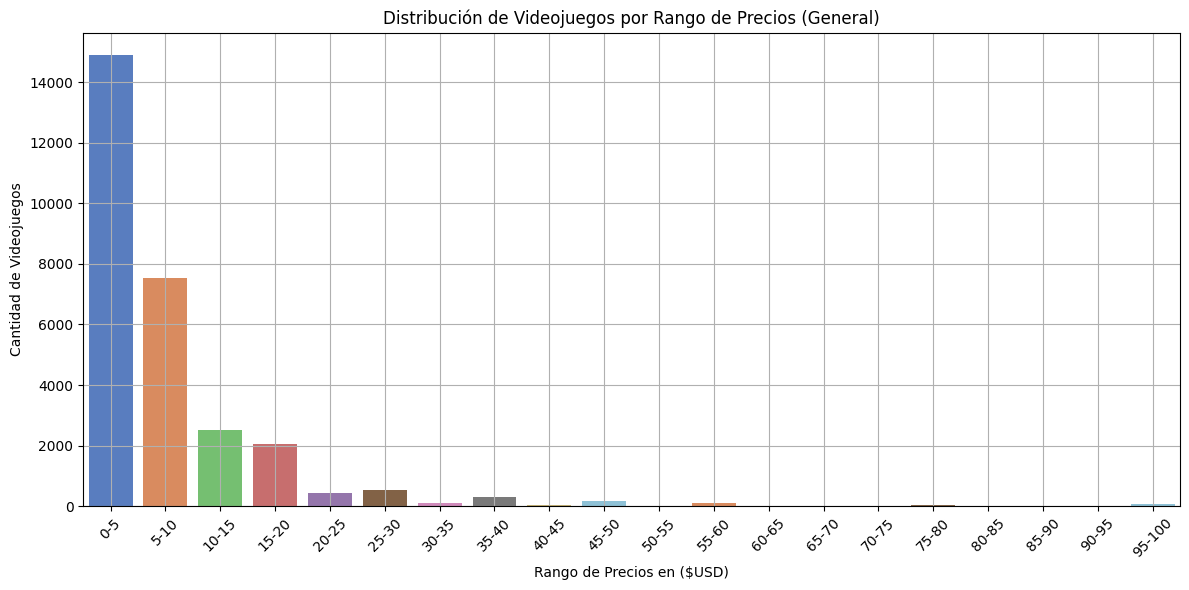

In [33]:
# Contar cuántos precios hay en cada rango
rango_precio_counts = df_analisis["price_range"].value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(12, 6))  # Tamaño de la figura
sns.barplot(x=rango_precio_counts.index, y=rango_precio_counts.values, palette="muted")

# Etiquetas y título
plt.xlabel('Rango de Precios en ($USD)')
plt.ylabel('Cantidad de Videojuegos')
plt.title('Distribución de Videojuegos por Rango de Precios (General)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()  # Ajustar el layout para que no se solapen las etiquetas
plt.grid()
plt.show()


In [34]:
# Calcular la cantidad de juegos por cada precio único
distribucion_precios = df_analisis["cleaned_price"].value_counts().sort_index()

# Calcular la proporción de juegos por precio (frecuencia relativa)
distribucion_precios_proporcion = distribucion_precios / distribucion_precios.sum()

# Crear un DataFrame con la información de la distribución
df_distribucion = pd.DataFrame({
    "Cantidad de Juegos": distribucion_precios,
    "Proporción de Juegos": distribucion_precios_proporcion
})

print(df_distribucion.head())  # Mostrar los primeros resultados para revisar


               Cantidad de Juegos  Proporción de Juegos
cleaned_price                                          
0.00                         1910              0.062098
0.49                            2              0.000065
0.50                            1              0.000033
0.89                            1              0.000033
0.95                            1              0.000033


C:\Users\Elias\AppData\Local\Temp\ipykernel_17700\3345165323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y=df_analisis["cleaned_price"], palette="muted", jitter=True)


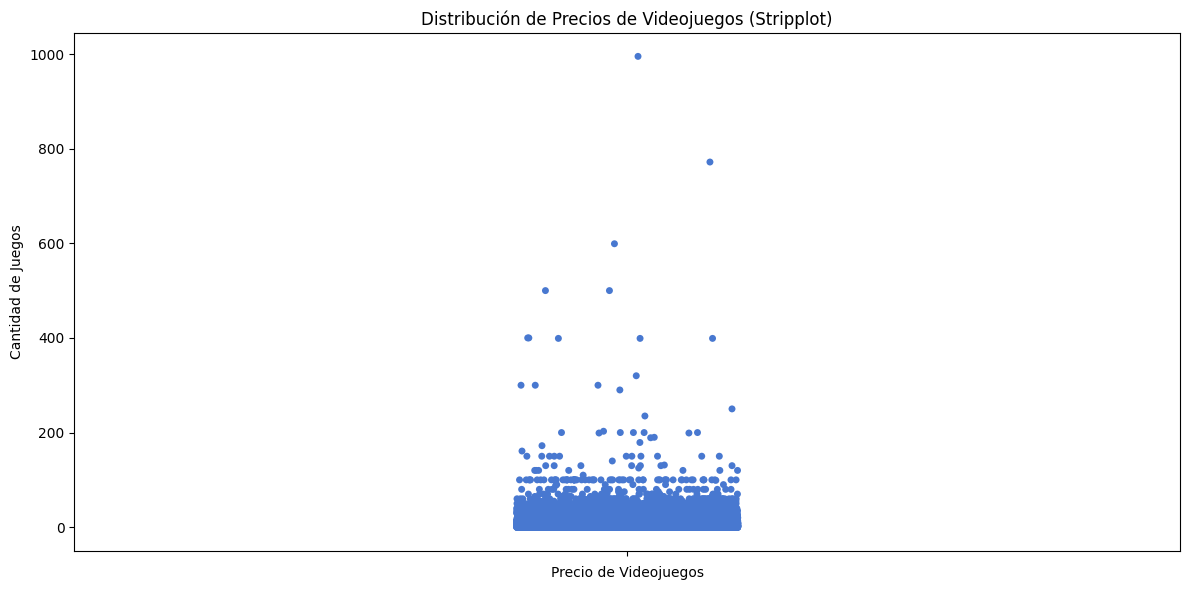

In [35]:
plt.figure(figsize=(12, 6))  # Configurar tamaño del gráfico

# Usar stripplot para graficar la distribución de precios
sns.stripplot(y=df_analisis["cleaned_price"], palette="muted", jitter=True)

# Etiquetas y título
plt.xlabel('Precio de Videojuegos')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Precios de Videojuegos (Stripplot)')
plt.tight_layout()
plt.show()

In [36]:
#creamos un dataframe con el dataframe "genres" y cleaned_price

df_genres_price = df_analisis[["cleaned_price", "genres"]]
#Del dataframe df_genres_price lo categorizamos en los 10 mas frecuentados

top_generos = df_genres_price["genres"].value_counts().head(10).index
df_genres_price = df_genres_price[df_genres_price["genres"].isin(top_generos)]
df_genres_price.head()

,cleaned_price,genres
0,4.99,Action
1,0.00,Indie
2,0.00,Casual
3,0.99,Action
4,2.99,Action


C:\Users\Elias\AppData\Local\Temp\ipykernel_17700\3834473045.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="genres", y="cleaned_price", data=df_genres_price, palette="Set3")


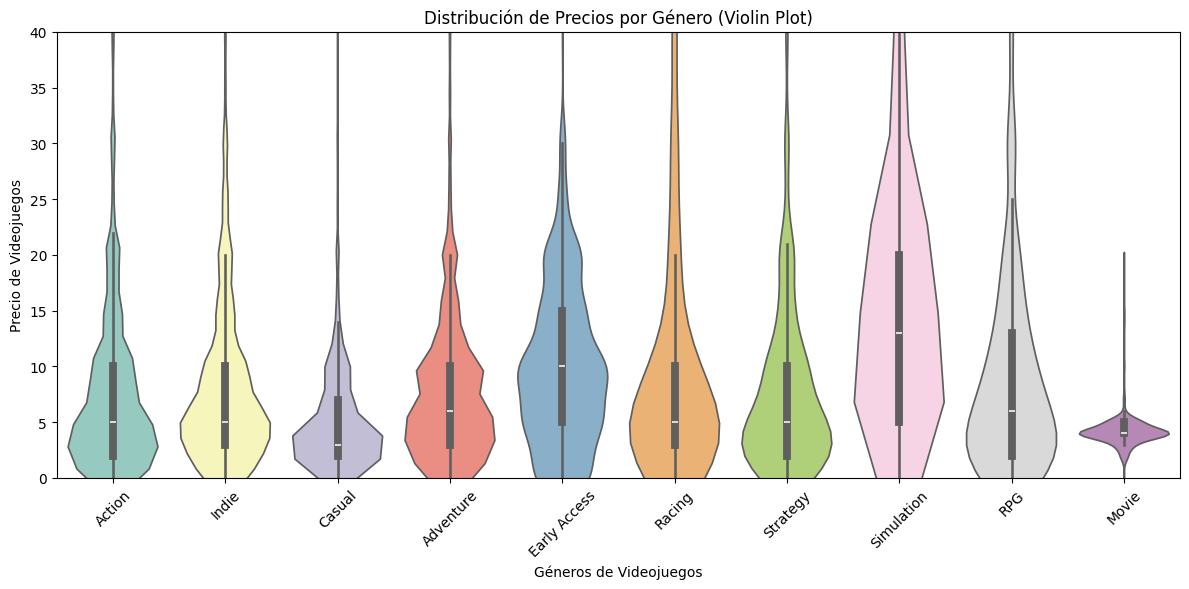

In [37]:
plt.figure(figsize=(12, 6))  # Configurar el tamaño del gráfico

# Gráfico de violín con un rango limitado de precios
sns.violinplot(x="genres", y="cleaned_price", data=df_genres_price, palette="Set3")

# Etiquetas y título
plt.xlabel('Géneros de Videojuegos')
plt.ylabel('Precio de Videojuegos')
plt.title('Distribución de Precios por Género (Violin Plot)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad

# Limitar el rango de precios en el eje Y
plt.ylim(0, 40)  

plt.tight_layout()

plt.show()

EDA del dataset reviews_clean


In [38]:
#Ruta del origen del dataset
ruta = r"C:\Users\Elias\Documents\Primer Proyecto Individual\Datasets limpios\reviews_clean.parquet"
#Cargamos el dataset que trabajaremos
df_reviews_clean = pd.read_parquet(ruta)
df_reviews = df_reviews_clean
df_reviews.head()


,user_id,user_url,posted,item_id,helpful,recommend,sentiment_scores,review_clean,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,"{'compound': 0.8481, 'neg': 0.077, 'neu': 0.68...",Simple yet with great replayability. In my opi...,2
1,js41637,http://steamcommunity.com/id/js41637,"Posted July 15, 2011.",22200,No ratings yet,True,"{'compound': 0.2263, 'neg': 0.0, 'neu': 0.678,...",It's unique and worth a playthrough.,2
2,evcentric,http://steamcommunity.com/id/evcentric,"Posted April 21, 2011.",43110,No ratings yet,True,"{'compound': 0.9117, 'neg': 0.0, 'neu': 0.704,...",Great atmosphere. The gunplay can be a bit chu...,2
3,doctr,http://steamcommunity.com/id/doctr,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,"{'compound': 0.9566, 'neg': 0.067, 'neu': 0.71...",I know what you think when you see this title ...,2
4,maplemage,http://steamcommunity.com/id/maplemage,"Posted September 8, 2013.",227300,0 of 1 people (0%) found this review helpful,True,"{'compound': 0.9708, 'neg': 0.042, 'neu': 0.76...",For a simple (it's actually not all that simpl...,2


In [39]:
#Se describe el dataset reviews_clean_sentiment
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
describir_dataframe(df_reviews)

La cantidad de registros que hay son: 59305

--- Descripción de la columna: 'user_id' ---
Tipo de dato: object
Número de valores únicos: 25477
Número de valores nulos: 33515

--- Descripción de la columna: 'user_url' ---
Tipo de dato: object
Número de valores únicos: 25477
Número de valores nulos: 33515

--- Descripción de la columna: 'posted' ---
Tipo de dato: object
Número de valores únicos: 1906
Número de valores nulos: 0

--- Descripción de la columna: 'item_id' ---
Tipo de dato: object
Número de valores únicos: 3682
Número de valores nulos: 0

--- Descripción de la columna: 'helpful' ---
Tipo de dato: object
Número de valores únicos: 1344
Número de valores nulos: 0

--- Descripción de la columna: 'recommend' ---
Tipo de dato: bool
Número de valores únicos: 2
Número de valores nulos: 0
Valor mínimo: False
Valor máximo: True
Promedio: 0.8847989208329821
Mediana: 1.0
Desviación estándar: 0.31926714408676327

--- Descripción de la columna: 'sentiment_scores' ---
Tipo de dato: object
C

In [40]:
#Mostramos el DataFrame para ver el procedimiento 
df_reviews.head()

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_scores,review_clean,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,"{'compound': 0.8481, 'neg': 0.077, 'neu': 0.68...",Simple yet with great replayability. In my opi...,2
1,js41637,http://steamcommunity.com/id/js41637,"Posted July 15, 2011.",22200,No ratings yet,True,"{'compound': 0.2263, 'neg': 0.0, 'neu': 0.678,...",It's unique and worth a playthrough.,2
2,evcentric,http://steamcommunity.com/id/evcentric,"Posted April 21, 2011.",43110,No ratings yet,True,"{'compound': 0.9117, 'neg': 0.0, 'neu': 0.704,...",Great atmosphere. The gunplay can be a bit chu...,2
3,doctr,http://steamcommunity.com/id/doctr,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,"{'compound': 0.9566, 'neg': 0.067, 'neu': 0.71...",I know what you think when you see this title ...,2
4,maplemage,http://steamcommunity.com/id/maplemage,"Posted September 8, 2013.",227300,0 of 1 people (0%) found this review helpful,True,"{'compound': 0.9708, 'neg': 0.042, 'neu': 0.76...",For a simple (it's actually not all that simpl...,2


In [41]:
# Calculamos el porcentaje de los 10 valores más comunes en la columna 'sentiment_analysis'
porcentaje_reviews = df_reviews["sentiment_analysis"].value_counts(normalize=True) * 100

# Creamos un DataFrame con los resultados
df_porcentaje = pd.DataFrame({'sentiment_analysis': porcentaje_reviews.index, 'Count': porcentaje_reviews.values})

# Mostramos el DataFrame resultante
print(df_porcentaje)


   sentiment_analysis      Count
0                   2  63.097547
1                   1  20.693028
2                   0  16.209426


In [42]:
# Calculamos el porcentaje de los 10 valores más comunes en la columna 'sentiment_analysis'
recomendaciones = df_reviews["recommend"].value_counts(normalize=True) * 100

# Creamos un DataFrame con los resultados
df_porcentaje_recomendacion = pd.DataFrame({'recommend': recomendaciones.index, 'Count': recomendaciones.values})

# Mostramos el DataFrame resultante
print(df_porcentaje_recomendacion)


   recommend      Count
0       True  88.479892
1      False  11.520108


In [43]:
#Analisamos la cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")
df_reviews["posted"] = df_reviews["posted"].str.extract(r'Posted (.+?)\.')

Cantidad de usuarios únicos que opinaron: 25478


In [44]:
#extraemos el año y el mes del dia de publicacion del comentario
df_reviews[['month', 'day_year']] = df_reviews['posted'].str.split(' ', n=1, expand=True)
df_reviews[['day', 'year']] = df_reviews['day_year'].str.split(', ', expand=True)
df_reviews.drop(columns=['day_year',"posted"], inplace=True)

df_reviews.head()

,user_id,user_url,item_id,helpful,recommend,sentiment_scores,review_clean,sentiment_analysis,month,day,year
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,"{'compound': 0.8481, 'neg': 0.077, 'neu': 0.68...",Simple yet with great replayability. In my opi...,2,November,5,2011
1,js41637,http://steamcommunity.com/id/js41637,22200,No ratings yet,True,"{'compound': 0.2263, 'neg': 0.0, 'neu': 0.678,...",It's unique and worth a playthrough.,2,July,15,2011
2,evcentric,http://steamcommunity.com/id/evcentric,43110,No ratings yet,True,"{'compound': 0.9117, 'neg': 0.0, 'neu': 0.704,...",Great atmosphere. The gunplay can be a bit chu...,2,April,21,2011
3,doctr,http://steamcommunity.com/id/doctr,251610,15 of 20 people (75%) found this review helpful,True,"{'compound': 0.9566, 'neg': 0.067, 'neu': 0.71...",I know what you think when you see this title ...,2,June,24,2014
4,maplemage,http://steamcommunity.com/id/maplemage,227300,0 of 1 people (0%) found this review helpful,True,"{'compound': 0.9708, 'neg': 0.042, 'neu': 0.76...",For a simple (it's actually not all that simpl...,2,September,8,2013


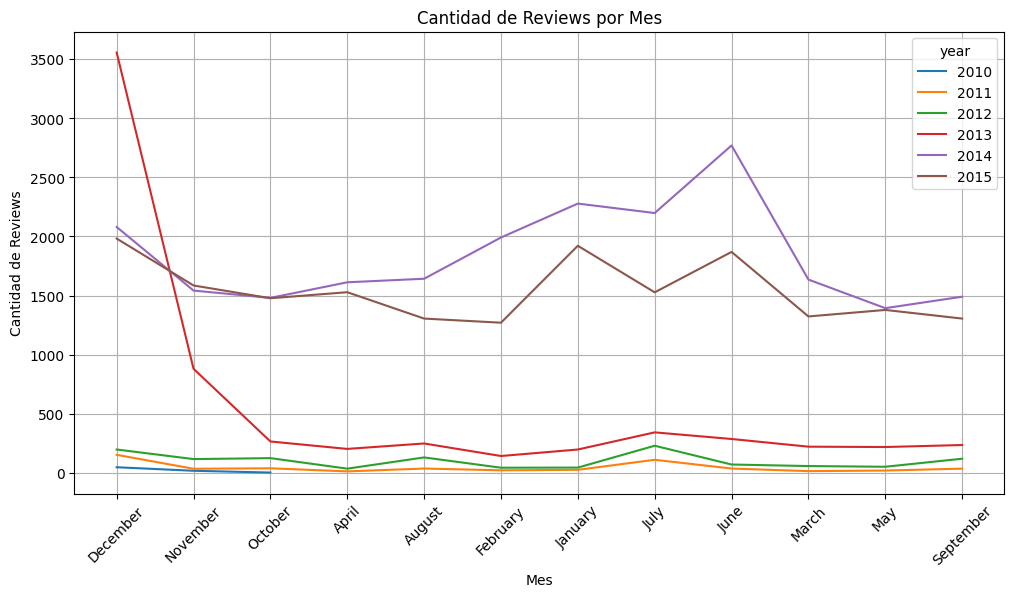

In [45]:
df_counts = df_reviews.groupby(['year', 'month']).size().reset_index(name='Cantidad de reviews')

#graficamos la cantidad de reviews por mes
plt.figure(figsize=(12, 6))
plt.grid()
sns.lineplot(x='month', y='Cantidad de reviews', hue='year', data=df_counts)
plt.title('Cantidad de Reviews por Mes')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de Reviews')
plt.show()

EDA del dataset items_clean

In [47]:
#Ruta del origen del dataset
ruta = r"C:\Users\Elias\Documents\Primer Proyecto Individual\Datasets limpios\items_clean.parquet"
#Cargamos el dataset que Analisaremos
df_items_clean = pd.read_parquet(ruta)
df_items = df_items_clean
df_items.head()

,user_id,items_count,item_id,playtime_forever
0,76561197970982479,277,10,6.0
1,76561197970982479,277,20,0.0
2,76561197970982479,277,30,7.0
3,76561197970982479,277,40,0.0
4,76561197970982479,277,50,0.0


In [48]:
#calculamos la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')

#analisamos el dataset df_items
describir_dataframe(df_items)

La cantidad de registros que hay son: 5170015

--- Descripción de la columna: 'user_id' ---
Tipo de dato: object
Número de valores únicos: 87626
Número de valores nulos: 0

--- Descripción de la columna: 'items_count' ---
Tipo de dato: int64
Número de valores únicos: 925
Número de valores nulos: 0
Valor mínimo: 0
Valor máximo: 7762
Promedio: 313.69987301777655
Mediana: 137.0
Desviación estándar: 692.4635207334131

--- Descripción de la columna: 'item_id' ---
Tipo de dato: object
Número de valores únicos: 10978
Número de valores nulos: 16806

--- Descripción de la columna: 'playtime_forever' ---
Tipo de dato: float64
Número de valores únicos: 48861
Número de valores nulos: 16806
Valor mínimo: 0.0
Valor máximo: 642773.0
Promedio: 991.4951407947941
Mediana: 34.0
Desviación estándar: 5418.204404857234


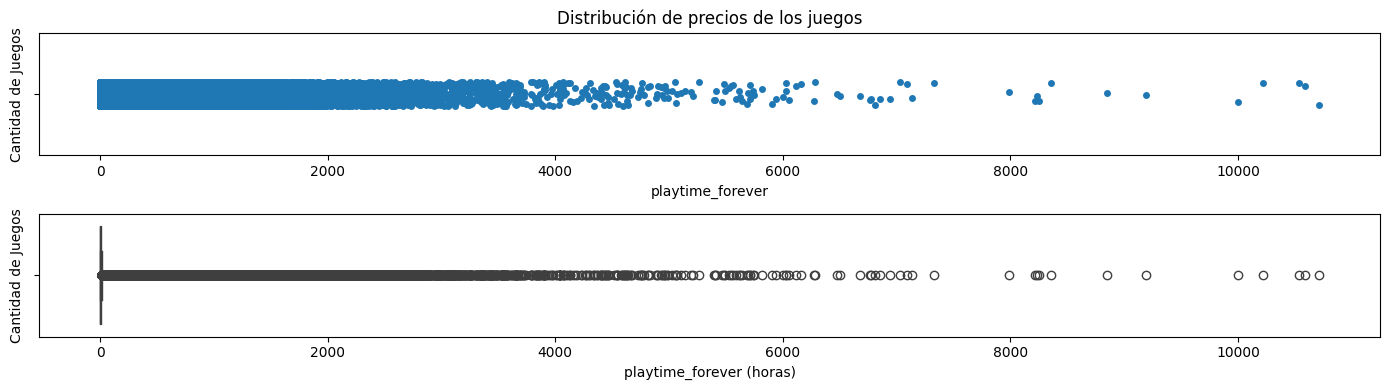

In [490]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

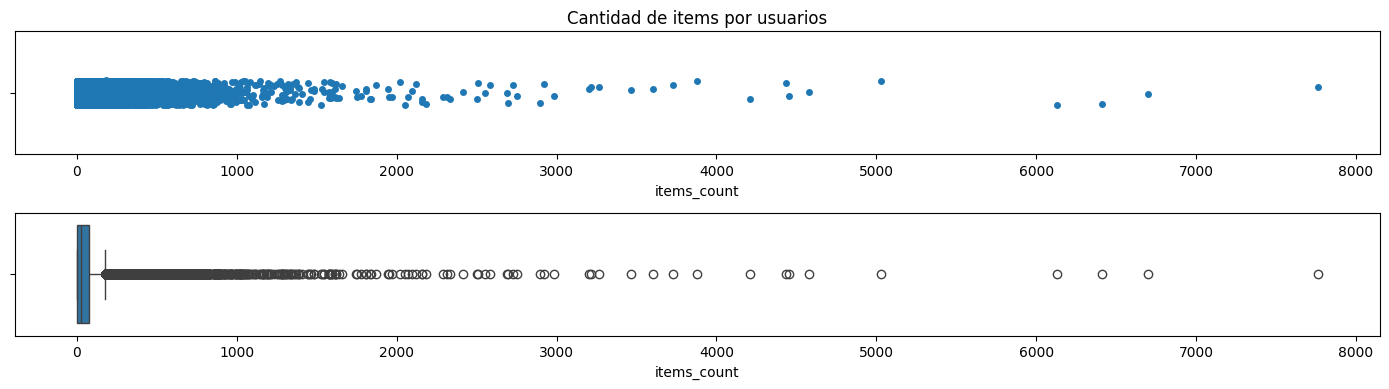

In [49]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()
